# Bank Dataset

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#importing libraries for machine learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [2]:
#importing the dataset
df = pd.read_csv('C:/Users/DELL/OneDrive/Desktop/DATA SCIENCE COURSE (Datasets)/bank-additional-full.csv', sep=';')

In [3]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df.shape

(41188, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

#### It shows no missing value in the dataframe but it is mentioned in the data dictionary that some columns contains null values as unknown.

### Replacing unknown values with mode function 

In [8]:
df['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [9]:
df.job[df.job == 'unknown'] = df.job.mode()[0]

In [10]:
df['job'].value_counts()

admin.           10752
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
Name: job, dtype: int64

In [11]:
df['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [12]:
df.marital[df.marital == 'unknown'] = df.marital.mode()[0]

In [13]:
df['marital'].value_counts()

married     25008
single      11568
divorced     4612
Name: marital, dtype: int64

In [14]:
df['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [15]:
df.education[df.education == 'unknown'] = df.education.mode()[0]

In [16]:
df['education'].value_counts()

university.degree      13899
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
illiterate                18
Name: education, dtype: int64

In [17]:
df['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [18]:
df.default[df.default == 'unknown'] = df.default.mode()[0]

In [19]:
df['default'].value_counts()

no     41185
yes        3
Name: default, dtype: int64

In [20]:
df['housing'].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [21]:
df.housing[df.housing == 'unknown'] = df.housing.mode()[0]

In [22]:
df['housing'].value_counts()

yes    22566
no     18622
Name: housing, dtype: int64

In [23]:
df['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [24]:
df.loan[df.loan == 'unknown'] = df.loan.mode()[0]

In [25]:
df['loan'].value_counts()

no     34940
yes     6248
Name: loan, dtype: int64

#### Now the dataframe seems good for building a machine learning model

### Response Variable

<AxesSubplot:ylabel='y'>

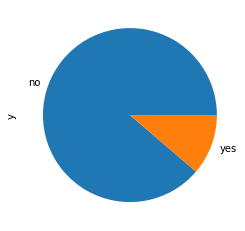

In [26]:
df['y'].value_counts().plot.pie()

#### wheather a customer will subscribe to term deposit product or not is to be predicted

### Applying Get Dummies function on Categorical columns

In [27]:
df = pd.get_dummies(df,columns = ['job','marital','education','default',
                                  'housing','loan','contact','month'
                                   ,'day_of_week','poutcome'
                                   , 'y'],drop_first = True)

In [28]:
df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 48 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   duration                       41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   pdays                          41188 non-null  int64  
 4   previous                       41188 non-null  int64  
 5   emp.var.rate                   41188 non-null  float64
 6   cons.price.idx                 41188 non-null  float64
 7   cons.conf.idx                  41188 non-null  float64
 8   euribor3m                      41188 non-null  float64
 9   nr.employed                    41188 non-null  float64
 10  job_blue-collar                41188 non-null  uint8  
 11  job_entrepreneur               41188 non-null  uint8  
 12  job_housemaid                  41188 non-null 

In [30]:
#shape has increased after encoding
df.shape

(41188, 48)

In [31]:
#assigning independent variables to x and dependent variable or response variable to y
x = df.drop('y_yes',axis = 1)
y = df['y_yes']

### Splitting the dataframe into training and testing data

In [32]:
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size = 0.30 , random_state = 20)

In [33]:
print("Dimension of x_train :",x_train.shape)
print("Dimension of x_test :",x_test.shape)
print("Dimension of y_train :",y_train.shape)
print("Dimension of y_test :",y_test.shape)

Dimension of x_train : (28831, 47)
Dimension of x_test : (12357, 47)
Dimension of y_train : (28831,)
Dimension of y_test : (12357,)


## Building a Random Forest model

### Taking criterion as entropy

In [34]:
#taking no of trees as 1000
rfc = RandomForestClassifier(n_estimators = 1000,criterion = "entropy")

In [35]:
rfc.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=1000)

In [36]:
predict_r = rfc.predict(x_test)

In [37]:
print(classification_report(y_test,predict_r))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95     11000
           1       0.66      0.45      0.54      1357

    accuracy                           0.91     12357
   macro avg       0.80      0.71      0.75     12357
weighted avg       0.91      0.91      0.91     12357



In [38]:
print(confusion_matrix(y_test,predict_r))

[[10688   312]
 [  742   615]]


#### Confusion Matrix tells that our model has correctly predicted 10691(true negative) and 605(true positive) values

In [39]:
accuracy_score(y_test,predict_r)

0.9147042162337137

#### accuracy score is 0.91 which is pretty good

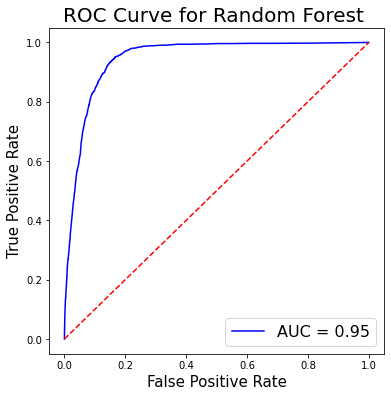

In [40]:
fig, ax = plt.subplots(figsize = (6,6))
probs = rfc.predict_proba(x_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

ax.plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('ROC Curve for Random Forest ',fontsize = 20)
ax.set_ylabel('True Positive Rate',fontsize = 15)
ax.set_xlabel('False Positive Rate',fontsize = 15)
ax.legend(loc = 'lower right', prop={'size': 16})

plt.subplots_adjust(wspace = 1)

#### Area under curve is 0.95 which means model has a good measure of separability i.e model can distinguish between positive and negative class

### Taking criterion as gini

In [41]:
rfc = RandomForestClassifier(n_estimators = 1000,criterion = "gini")

In [42]:
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=1000)

In [43]:
predict_r = rfc.predict(x_test)

In [44]:
print(confusion_matrix(y_test,predict_r))

[[10671   329]
 [  727   630]]


#### Confusion Matrix tells that our model has correctly predicted 10678(true negative) and 629(true positive) values

In [45]:
accuracy_score(y_test,predict_r)

0.9145423646516144

#### accuracy score is 0.91 which is pretty good

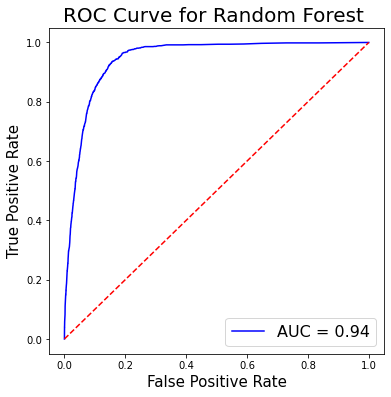

In [46]:
fig, ax = plt.subplots(figsize = (6,6))
probs = rfc.predict_proba(x_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

ax.plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('ROC Curve for Random Forest ',fontsize = 20)
ax.set_ylabel('True Positive Rate',fontsize = 15)
ax.set_xlabel('False Positive Rate',fontsize = 15)
ax.legend(loc = 'lower right', prop={'size': 16})

plt.subplots_adjust(wspace = 1)

#### Area under curve is 0.94 which means model has a good measure of separability i.e model can distinguish between positive and negative class

### It can be inferred that the confusion matrix produced by entropy and gini has true positive value as 605 and 629 respectively. 
### Model with criterion as gini is more suitable as bank's main focus is on the customers who would actually subscribe to the term deposit product of the bank.